# Project 4: customer clustering using credit card data

## Introduction
- For this Project we are trying to help a marketing agenecy prepare a a tarageted marketing plan using credit card data.
- we are hired to cluster data to help with find anything they can use to help them in their goal.

## Defining what  we want from this dataset:
- we want to cluster our data to idenify people who could be low to high spenders:
- people who have enough to spend and possible over spend on their products
- People who love installment loans and think their safe with their money.

## dataset link:

https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
# import packages

import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import data
orignalCreditCardData=pd.read_csv("CC General.csv")

In [4]:
# Look inside data
print(orignalCreditCardData.dtypes)
print(orignalCreditCardData.columns)
orignalCreditCardData.head()

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
  

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# count how many null values we have
orignalCreditCardData.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

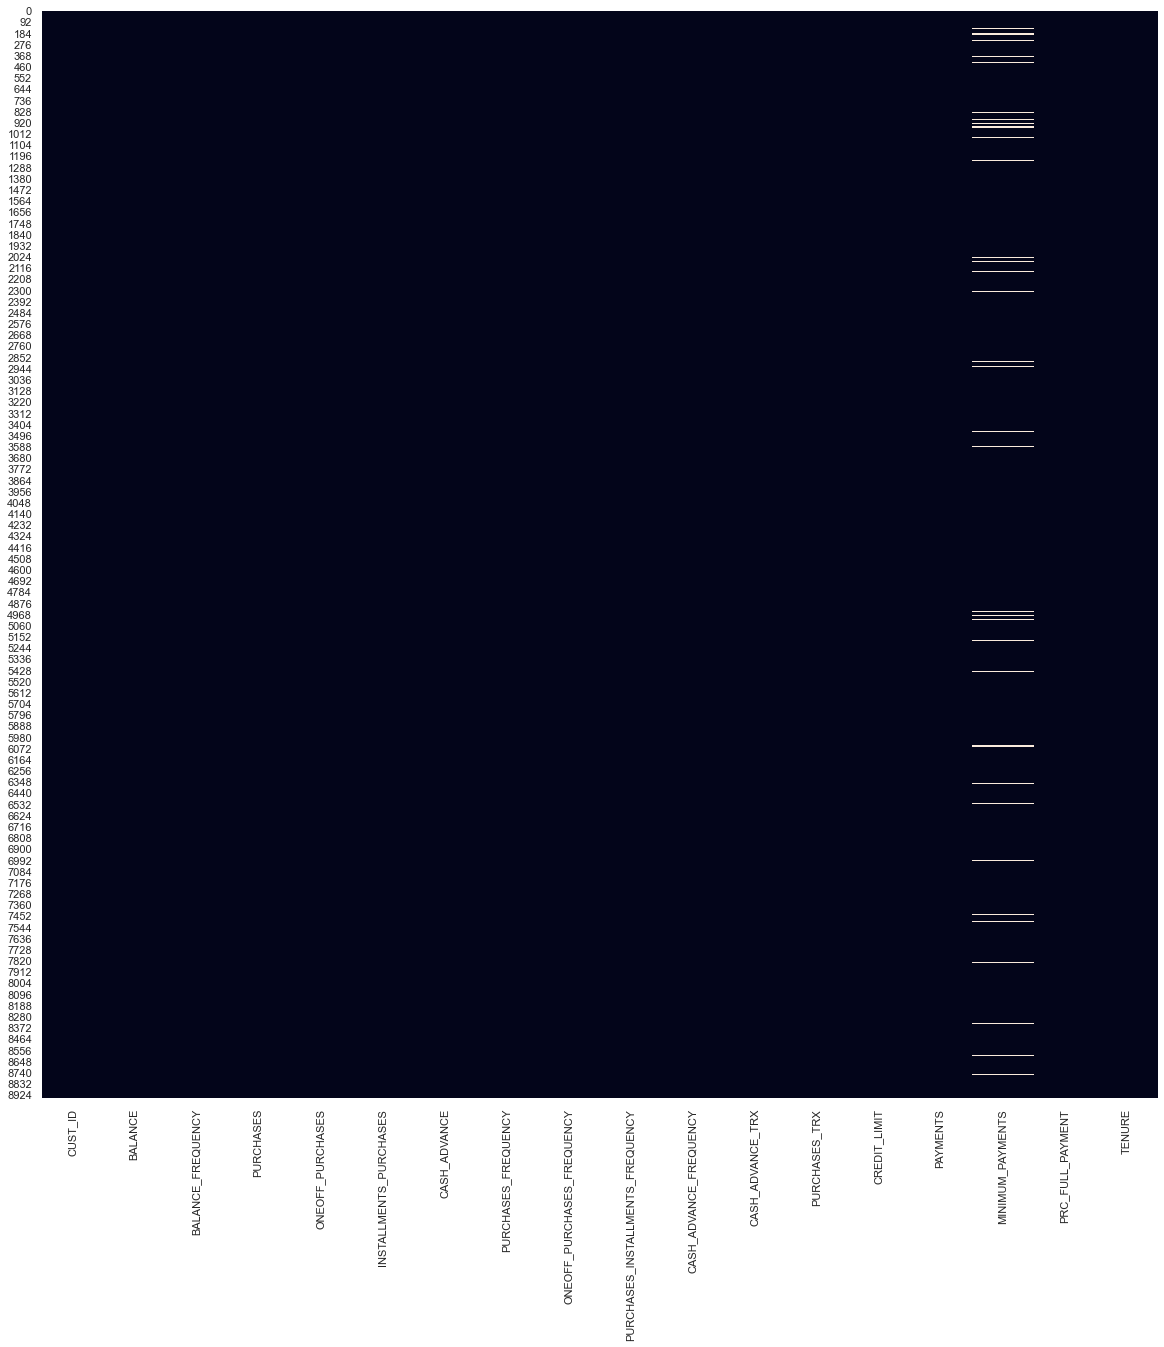

In [6]:
# ploting each columns null values
sns.set(rc={'figure.figsize':(20,20)} )
sns.heatmap(orignalCreditCardData.isnull(), cbar=False)



In [7]:
# Need to deal with null values in minimum_payments:

secondDataset=orignalCreditCardData

for i in ["MINIMUM_PAYMENTS","CREDIT_LIMIT"]:
    secondDataset[i]=secondDataset[i].fillna(0)




In [8]:
#Checks again if we have null values in our dataset
secondDataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

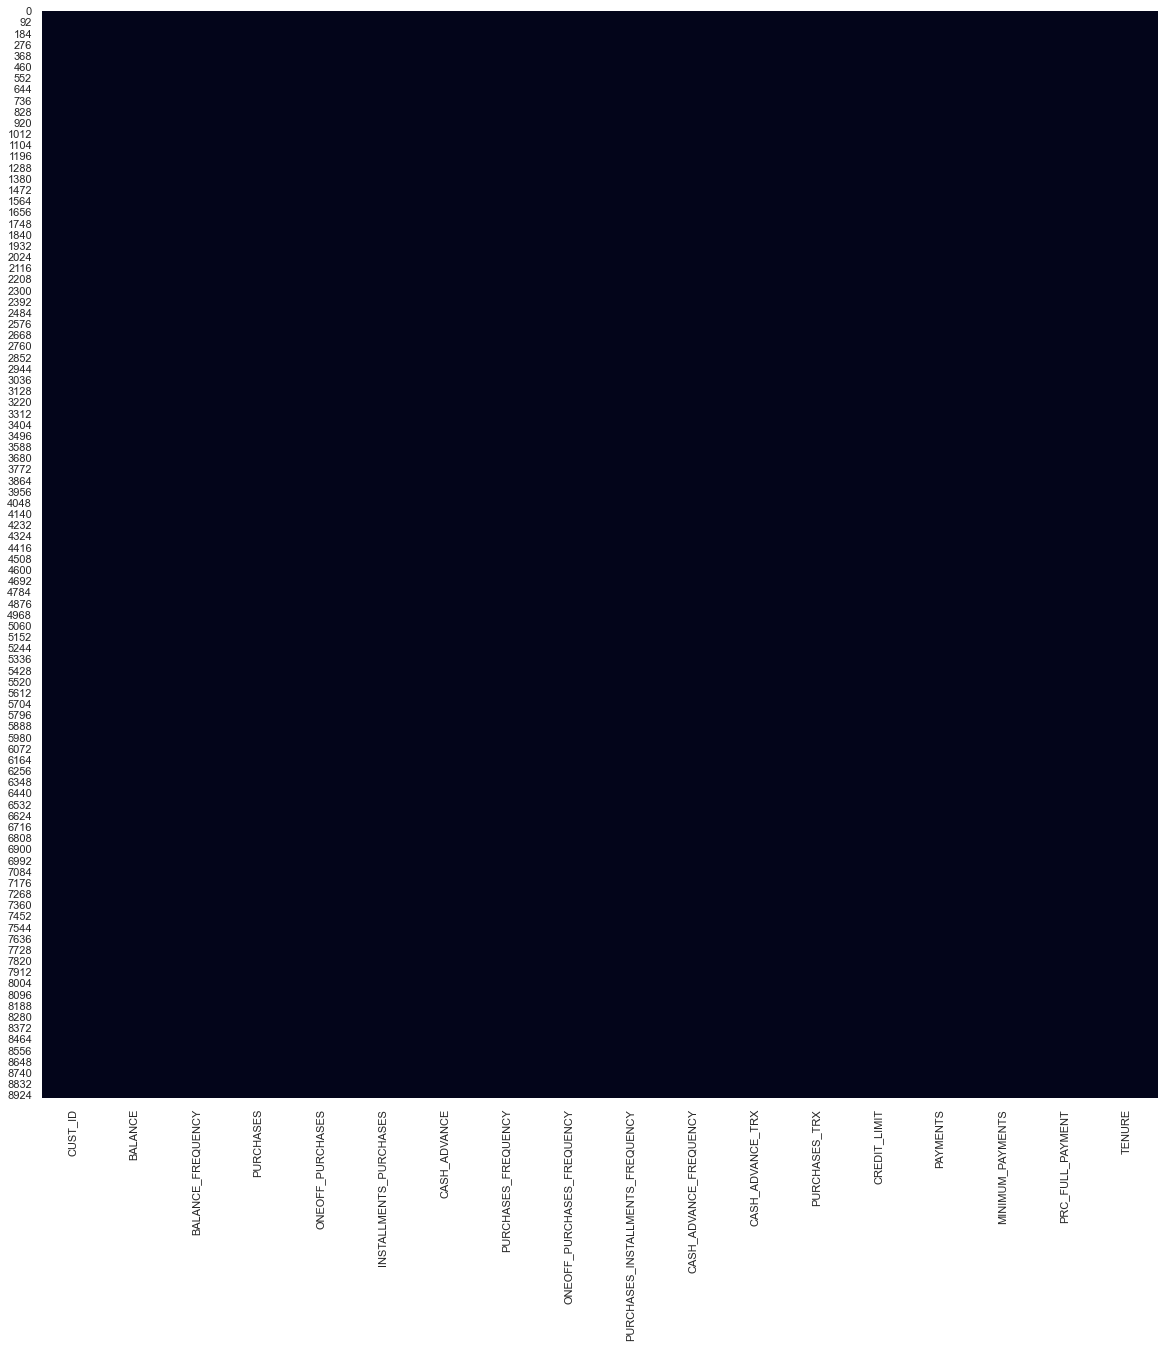

In [9]:
## graph the information to make sure we have  no null values

sns.heatmap(orignalCreditCardData.isnull(), cbar=False)

<AxesSubplot:>

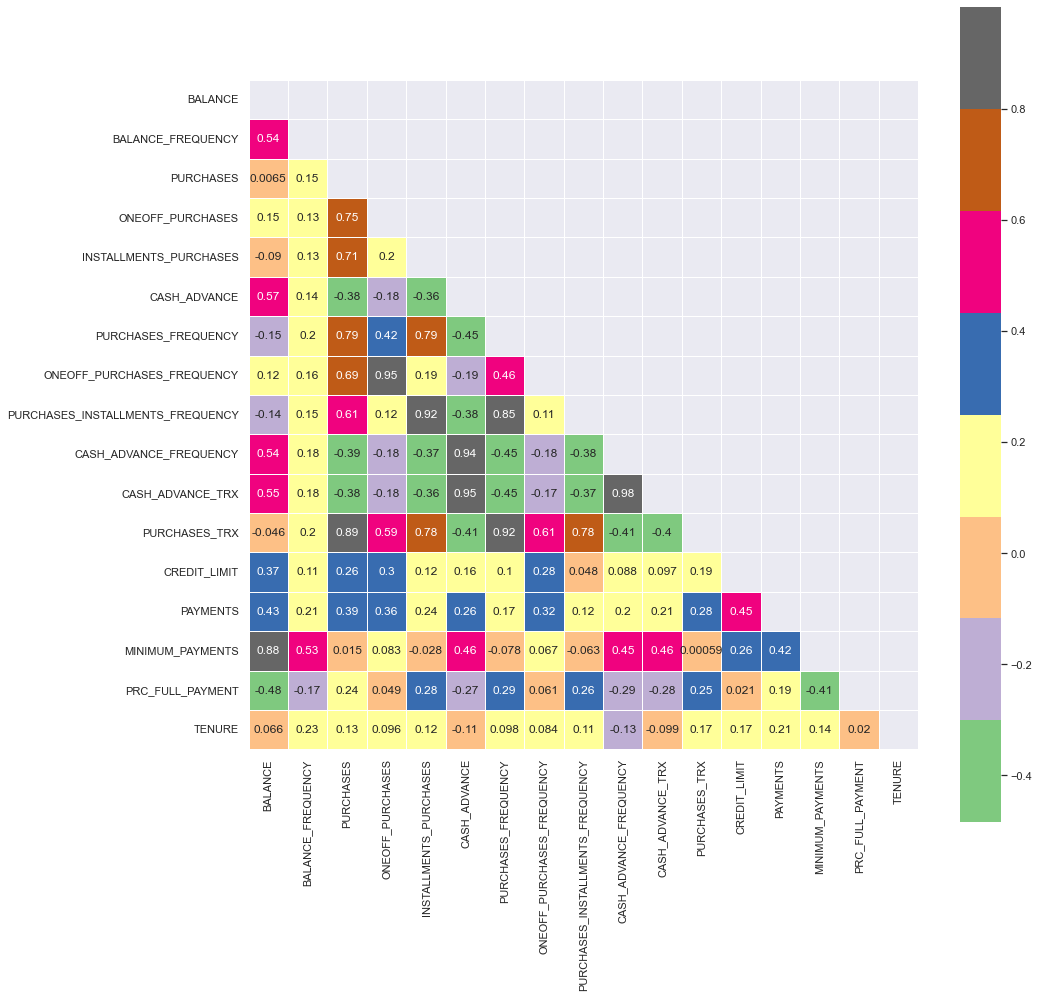

In [15]:
# Correlation map for possible combinations

corelationMatrix = secondDataset.corr(method="spearman")
mask=np.zeros_like(corelationMatrix)
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(15,15)} )
#corlor maps cividis, BuPu ,cool , RdBu (best one yet), seismic (pretty too)
# muti color per section is awesome :tab20c, Accent (one of the best one yet)
sns.heatmap(corelationMatrix,annot=True,square=True,linewidths=.5,cmap="Accent",mask=mask)

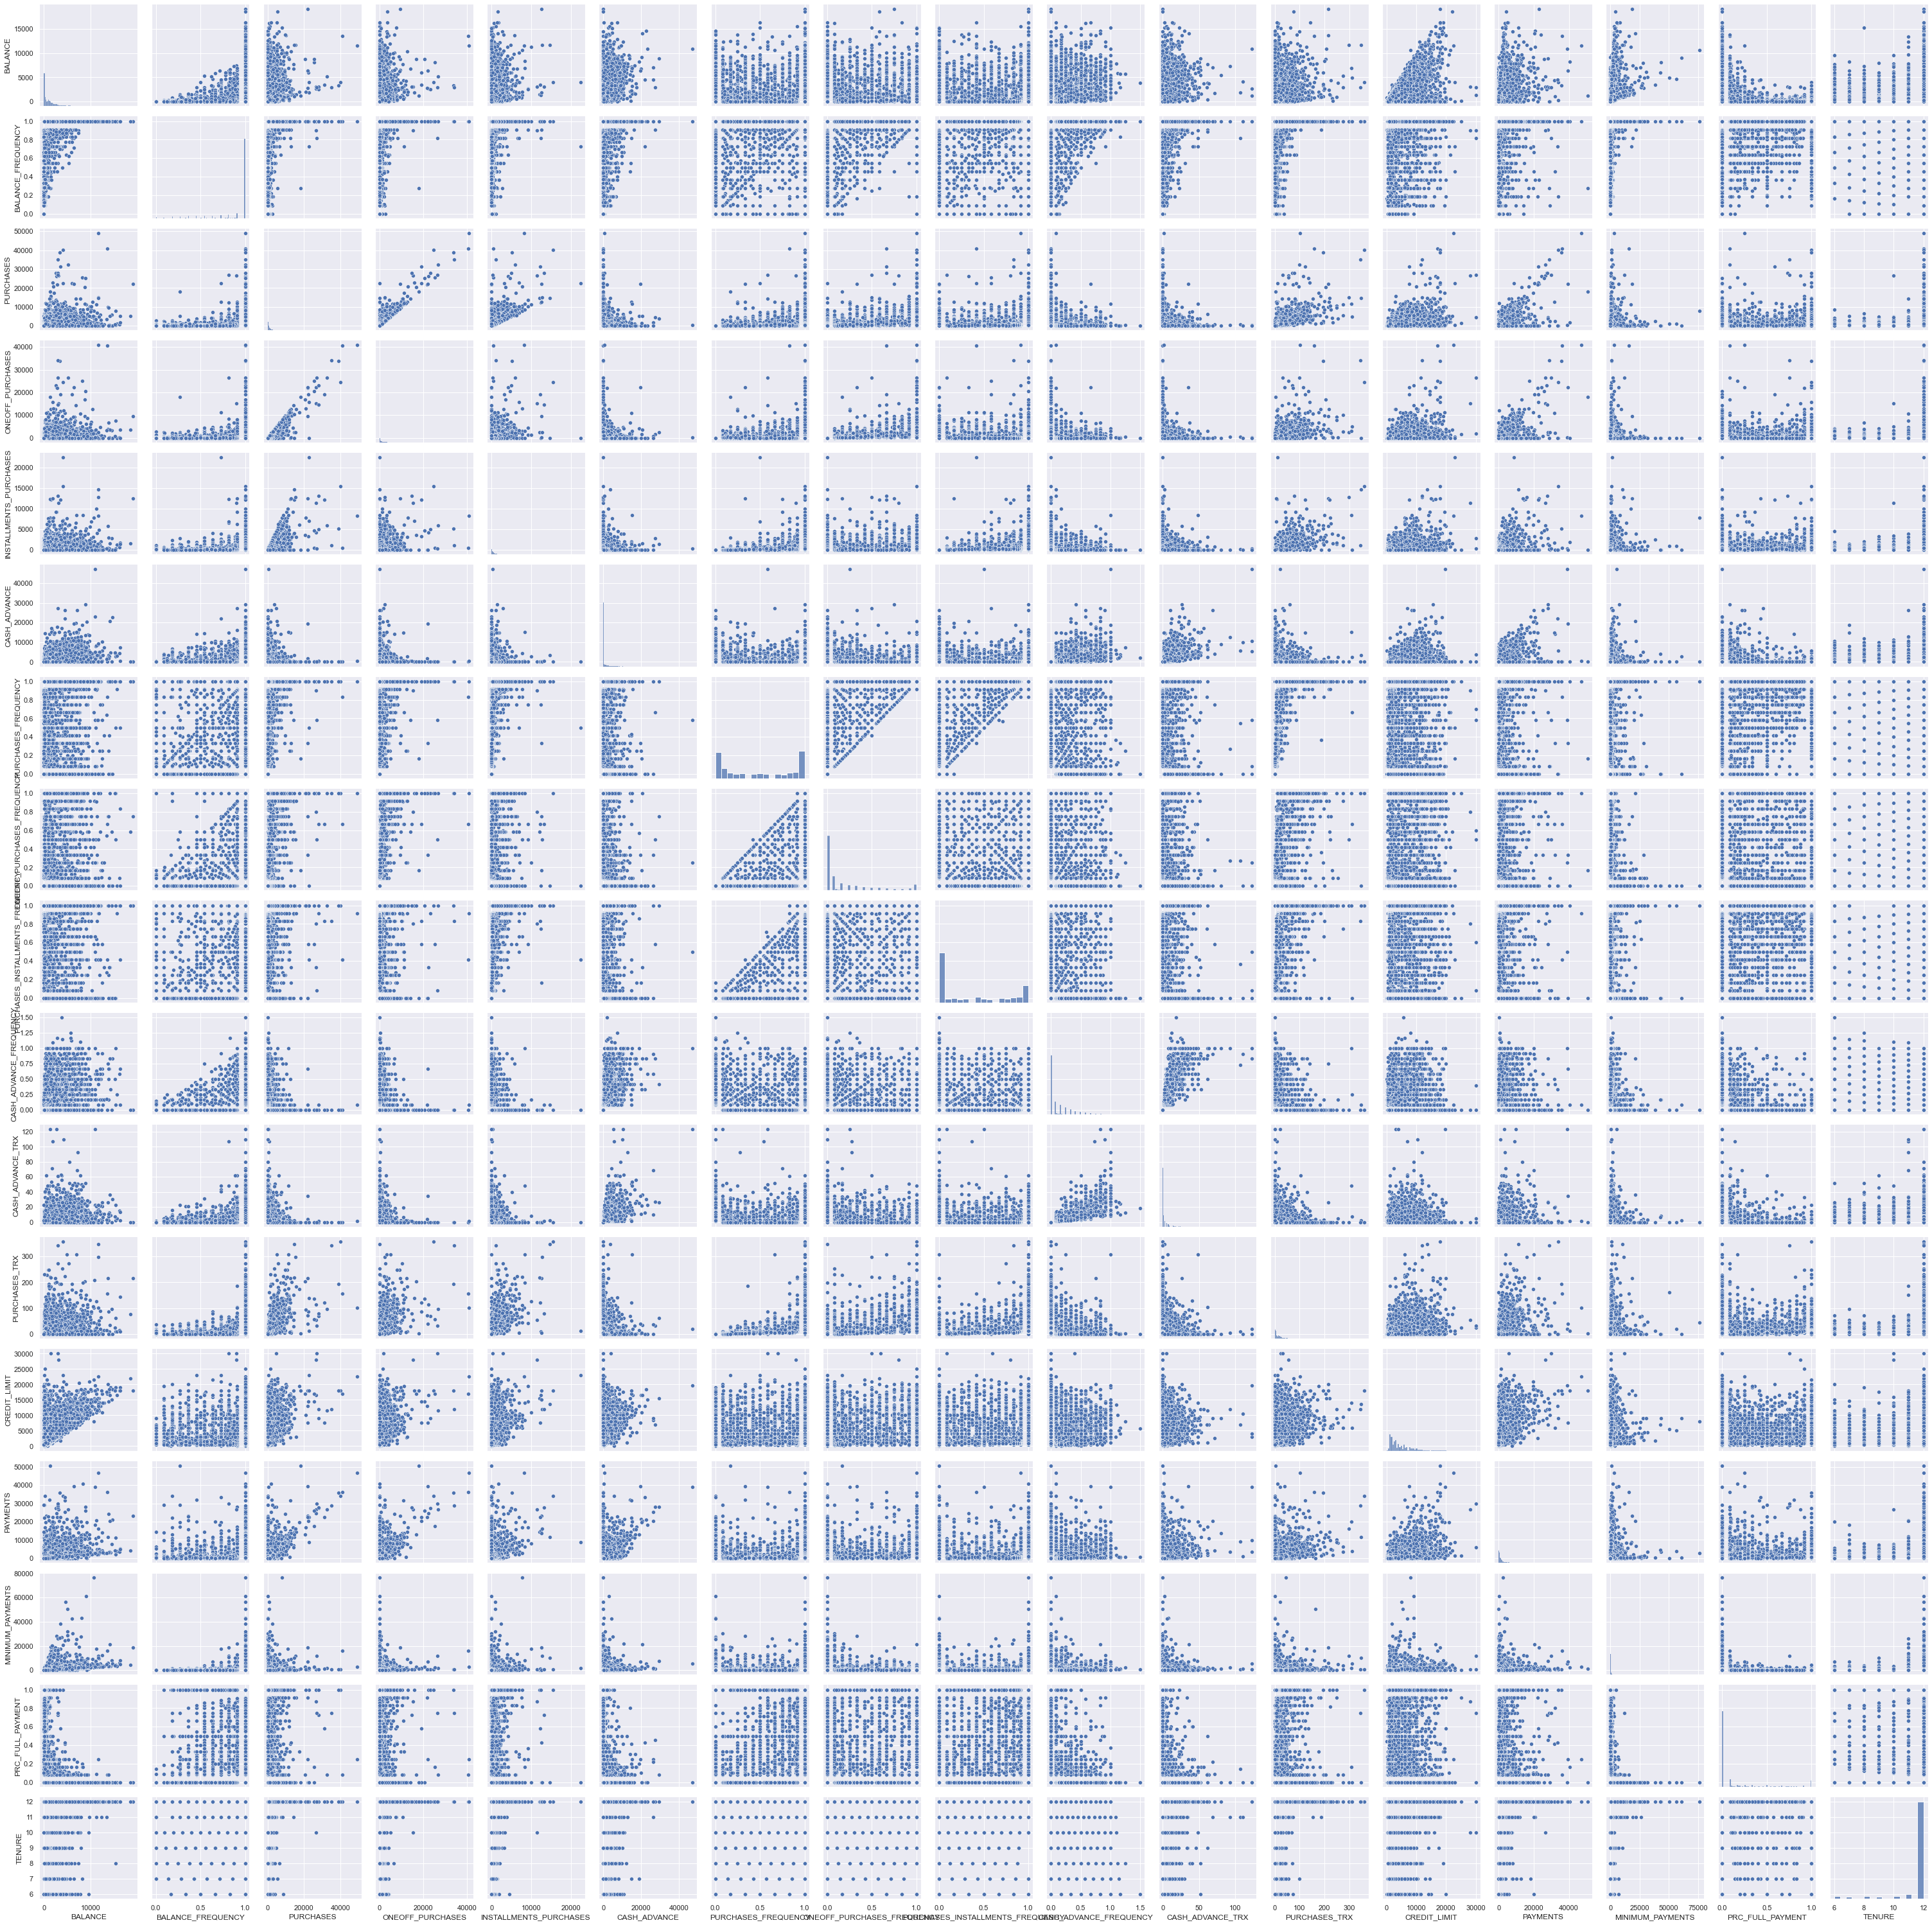

In [41]:
#create scatterplot
dataGrid= sns.PairGrid(secondDataset)
dataGrid.map_diag(sns.histplot)
dataGrid.map_offdiag(sns.scatterplot)

Notes from our findings:
- above 80
    -  balance and minimum have high correlation
    -  one off purchases and purchase trx
    - 

- Intresting:
    - balance and credit card limit work well together for clustering information.
    - purchases and one off purchases  (could be combine with another)
    - balnce and minuimum pay ment with 
    - purchase frequency and cash advance.
    - purchase and cerdit limit *
    - Purchase and cash advance
    

Nice we got red of all the null values and replaced them with zeros, now its time to try of classifcation algorithms

In [10]:
# create ratio dataset and scaler
from sklearn.preprocessing import StandardScaler



X = secondDataset[["BALANCE", "CREDIT_LIMIT"]]

scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)




In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 7)

model.fit(X_transformed)

KMeans(n_clusters=7)

In [12]:
labels = model.labels_
print(labels)

[0 2 2 ... 0 0 0]


In [13]:
# Centers
centers = model.cluster_centers_
centers_transformed = scaler.inverse_transform(centers)
print(scaler.inverse_transform(centers))

[[  461.33801764  1917.98710006]
 [ 1035.92771794 14181.48788927]
 [ 3956.24905999  7041.56043547]
 [ 2056.13744446  3194.8447768 ]
 [11350.56644944 15632.4742268 ]
 [  524.72723842  6784.43122633]
 [ 6852.45696556 10662.92906178]]


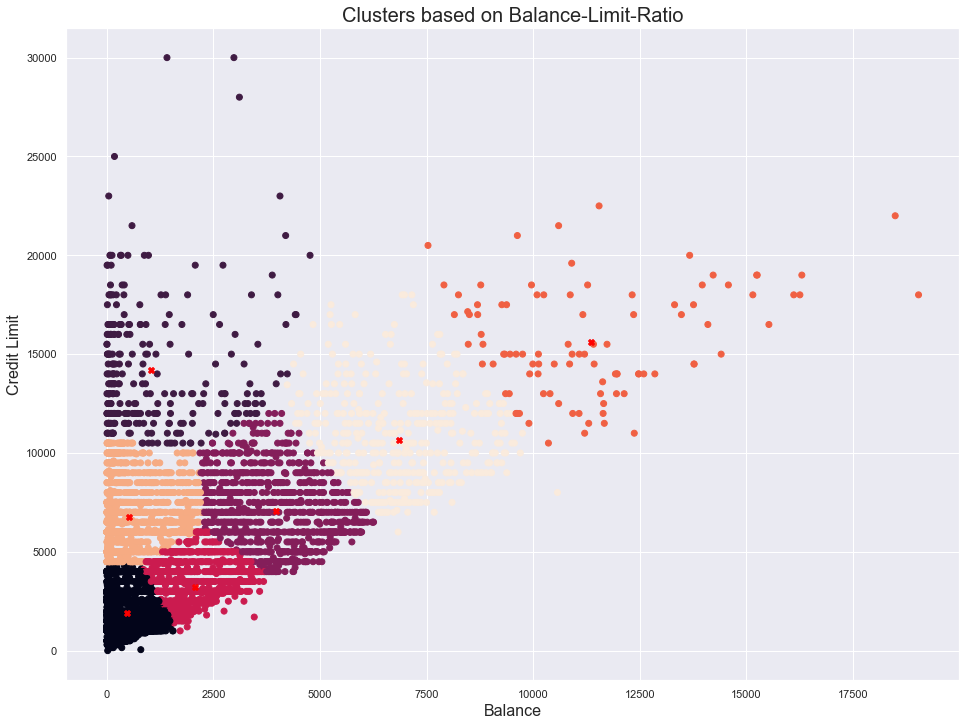

In [16]:
plt.figure(figsize = (16, 12))
plt.title("Clusters based on Balance-Limit-Ratio", fontsize = 20)
plt.scatter(secondDataset["BALANCE"], secondDataset["CREDIT_LIMIT"], c = labels)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c = "red", marker = "X")
plt.xlabel("Balance", fontsize = 16)
plt.ylabel("Credit Limit", fontsize = 16)
plt.show()

## balance and credit limit plot

-  In the work above we  decided to use the relationship between credit limit and balance and see how many cluster exist  in our data
- in the aboce we see that the data does follow a linear relationship with most of the data.
- there are some outlier with credit limit being high while having no balance
-  The graphs need to be scales because credit limit does not go up to 20k 

# Purchase and Credit Card Limit

In [64]:
# purchases and payment combination:

purchaseAndCreditCardLimit=secondDataset[["PURCHASES","CREDIT_LIMIT"]]

In [ ]:
plt.figure(figsize = (16, 12))
plt.title("Credit Card Limit vs. # purchases", fontsize = 20)
plt.scatter(secondDataset["PURCHASES"], secondDataset["CREDIT_LIMIT"], color = "grey")
plt.xlabel("Purchases", fontsize = 16)
plt.ylabel("Credit Card Limit", fontsize = 16)
plt.show()

In [66]:
# Scaling and  fit transformation
purchaseAndCreditCardLimitScaler=StandardScaler()
purchaseAndCreditCardLimitTransformed=purchaseAndCreditCardLimitScaler.fit_transform(purchaseAndCreditCardLimit)


In [67]:
# cluster and k mean

purchaseAndCreditCardLimitModel=KMeans(n_clusters=6)
purchaseAndCreditCardLimitModel.fit(purchaseAndCreditCardLimitTransformed)

KMeans(n_clusters=6)

In [68]:
#Labels:

purchaseAndCreditCardLimitLabels = purchaseAndCreditCardLimitModel.labels_
print(purchaseAndCreditCardLimitLabels)

[0 2 2 ... 0 0 0]


In [69]:
# centers

purchaseAndCreditCardLimitCenter = purchaseAndCreditCardLimitModel.cluster_centers_
purchaseAndCreditCardLimitCenters_Transformed = purchaseAndCreditCardLimitScaler.inverse_transform(purchaseAndCreditCardLimitCenter)
print(purchaseAndCreditCardLimitScaler.inverse_transform(purchaseAndCreditCardLimitCenter))

[[  420.58129615  2090.99052122]
 [ 8872.47452941 10735.88235294]
 [  539.3023319   6547.35769714]
 [28601.20772727 16113.63636364]
 [ 1190.13776262 12576.46657572]
 [ 3418.84488491  5540.44989537]]


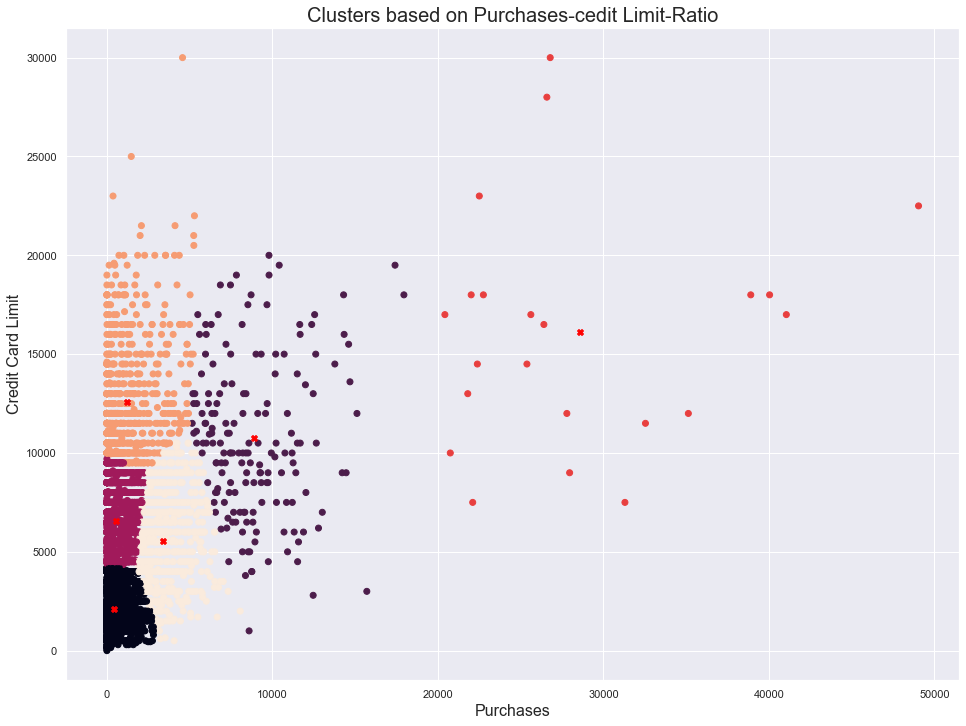

In [70]:
plt.figure(figsize = (16, 12))
plt.title("Clusters based on Purchases-cedit Limit-Ratio", fontsize = 20)
plt.scatter(secondDataset["PURCHASES"], secondDataset["CREDIT_LIMIT"], c = purchaseAndCreditCardLimitLabels)
plt.scatter(purchaseAndCreditCardLimitCenters_Transformed[:, 0], purchaseAndCreditCardLimitCenters_Transformed[:, 1], c = "red", marker = "X")
plt.xlabel("Purchases", fontsize = 16)
plt.ylabel("Credit Card Limit", fontsize = 16)
plt.show()

## Purchase and One Off purchases
- 

In [59]:
# purchase and cash advance  dataset:

purchaseAndOneOffDataset=secondDataset[["PURCHASES","ONEOFF_PURCHASES"]]

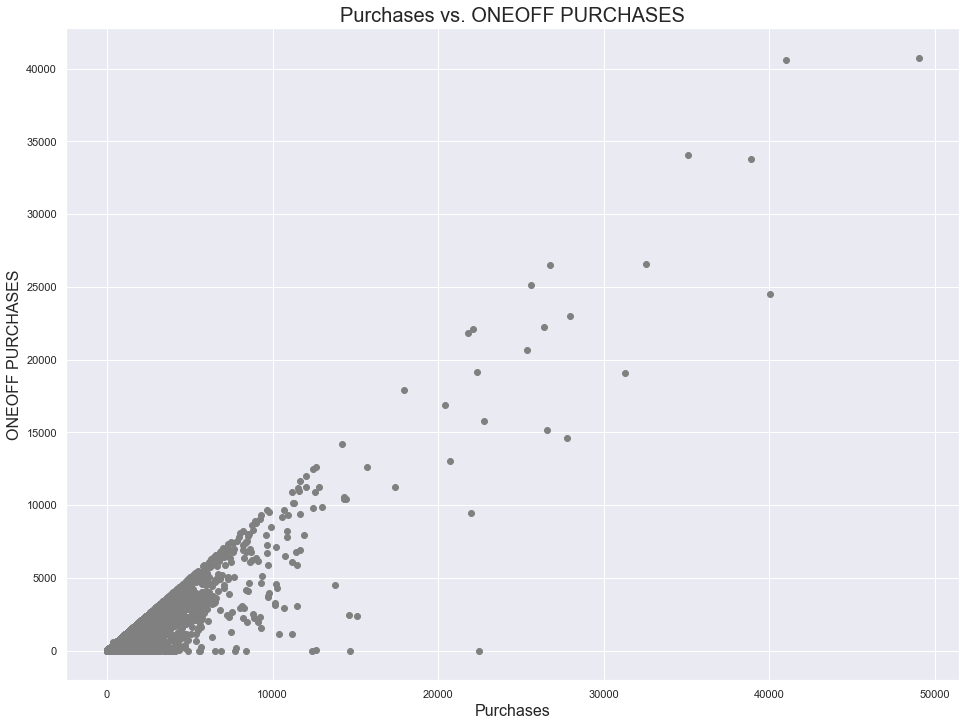

In [60]:
# plots
plt.figure(figsize = (16, 12))
plt.title("Purchases vs. ONEOFF PURCHASES", fontsize = 20)
plt.scatter(secondDataset["PURCHASES"], secondDataset["ONEOFF_PURCHASES"], color = "grey")
plt.xlabel("Purchases", fontsize = 16)
plt.ylabel("ONEOFF PURCHASES", fontsize = 16)
plt.show()

In [71]:

# scaler and fit 

purchaseAndOneOffScaler = StandardScaler()

purchaseAndOneOffX_transformed = purchaseAndOneOffScaler.fit_transform(purchaseAndOneOffDataset)



In [72]:
# k means
purchaseAndOneOffModel=KMeans(n_clusters=6)
purchaseAndOneOffModel.fit(purchaseAndOneOffX_transformed)

KMeans(n_clusters=6)

In [73]:
# labels
purchaseAndOneOfflabels = purchaseAndOneOffModel.labels_
print(purchaseAndOneOfflabels)

[0 0 0 ... 0 0 1]


In [74]:
# Centers
purchaseAndOneOffcenters = purchaseAndOneOffModel.cluster_centers_
purchaseAndOneOffcenters_transformed = purchaseAndOneOffScaler.inverse_transform(purchaseAndOneOffcenters)
print(purchaseAndOneOffScaler.inverse_transform(purchaseAndOneOffcenters))

[[  300.88194399   105.26030671]
 [ 1930.0479484   1138.85476658]
 [ 9955.99970874  7724.11184466]
 [40832.91       34764.08      ]
 [ 4850.29697105  3226.80755011]
 [24906.06875    19976.036875  ]]


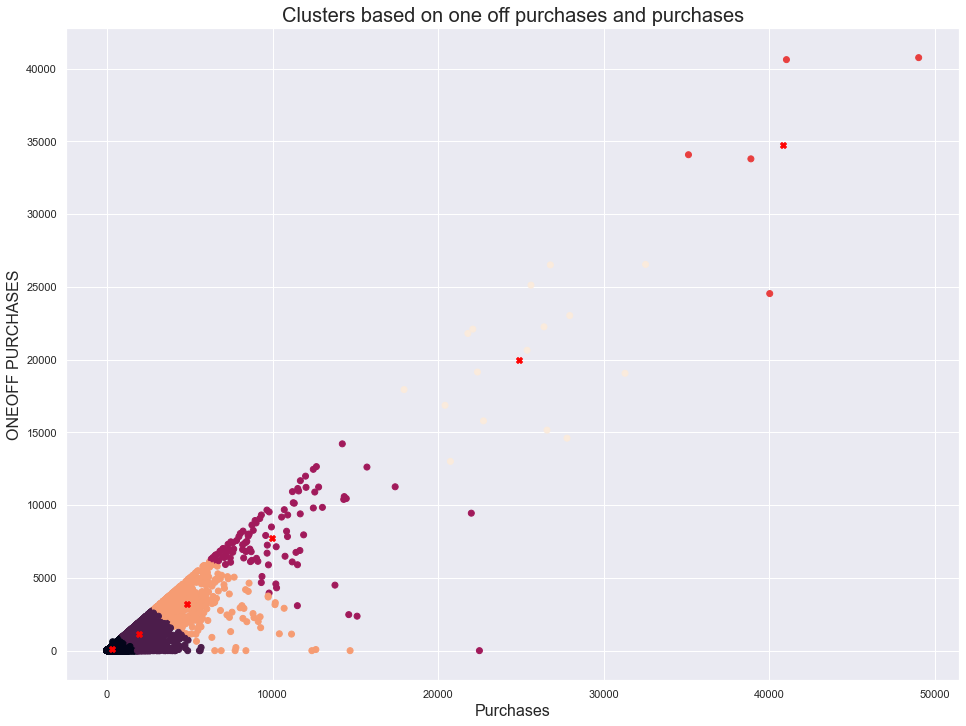

In [76]:
plt.figure(figsize = (16, 12))
plt.title("Clusters based on one off purchases and purchases", fontsize = 20)
plt.scatter(secondDataset["PURCHASES"], secondDataset["ONEOFF_PURCHASES"], c = purchaseAndOneOfflabels)
plt.scatter(purchaseAndOneOffcenters_transformed[:, 0], purchaseAndOneOffcenters_transformed[:, 1], c = "red", marker = "X")
plt.xlabel("Purchases", fontsize = 16)
plt.ylabel("ONEOFF PURCHASES", fontsize = 16)
plt.show()

# what we found from our clustering experiment:

-  Lots of features were unnessary or just the same with more information about 1 other column
- For our clusters we used 6 clusters to allow for enough seperations between customers:
- Based on the cluster of balance limit ratio we see that people with middle credit limit have bigger balances in their cards vs some split with people who have little balance with high credit limit and some with huge balances and great credit limits on their cards.
- Looking at our credit card limit vs  purchases it seems that people with medium to mid high do the most shopping  with people with lower credit card limits having less purchase activity.
- Looking at our one off purchases vs purchase we see a stong relation with one off purchases increasing with people who  purchase more. Semms like poeple who do the most one off purchase are between 15000 purchases and most occur as one offs.
- 

- recommendation for our clients
    - Using our data, we have determined a set of targeted customers your team can market promote your products.
    - People who purchase the most are people who do one off purchases.
    - targeting people who credit limit on their cards between 10k-20k have the biggest amount to spend.
    - Most purchases are done with people around 7.5k -10k plus 
    - 